In [1]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# dataset = "https://www.kaggle.com/datasets/erdemtaha/cancer-data/data"

In [3]:
# od.download(dataset)

In [4]:
data_dir = './cancer-data'

In [5]:
os.listdir(data_dir)

['boxplots.png',
 'Untitled4.ipynb',
 'pairwise_correlation_group1.png',
 'pairwise_correlation_group3.png',
 'pairwise_correlation_group2.png',
 'correlation_heatmap.png',
 'pairwise_correlation.png',
 '.ipynb_checkpoints',
 'cancer-data']

In [6]:
cancer_df = pd.read_csv('Cancer_Data.csv')

In [7]:
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
# Overview of columns:

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Column "Unnamed: 32" seems null, drop it
# Column id is not useful, drop it

cancer_df.drop(["Unnamed: 32","id"],axis=1,inplace = True) 


In [10]:
# Diagnosis is object, convert it to 0, 1 (B = 0 , M = 1)

cancer_df['diagnosis_binary'] = np.where(cancer_df['diagnosis'] == 'M', 1, 0)

In [11]:
# Include all columns (numeric, categorical, object, boolean, etc.)
cancer_df.describe(include='all')


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000


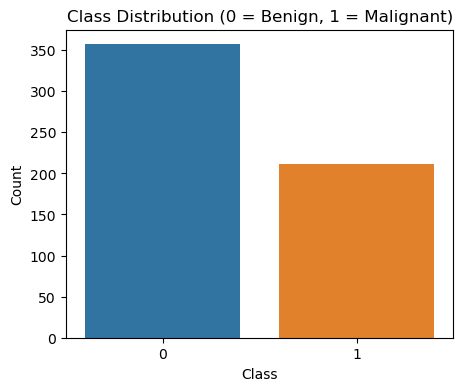

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x=cancer_df['diagnosis_binary'])
plt.title("Class Distribution (0 = Benign, 1 = Malignant)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [13]:
print("Number of Benign:", (cancer_df['diagnosis'] == 'B').sum())
print("Number of Malignant:", (cancer_df['diagnosis'] == 'M').sum())

Number of Benign: 357
Number of Malignant: 212


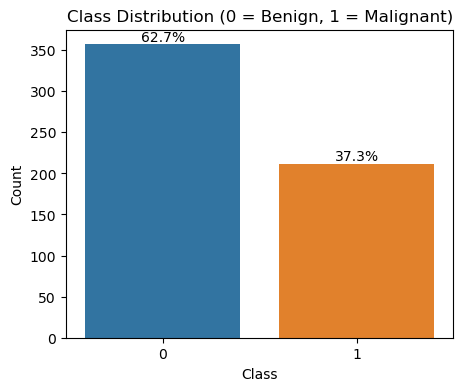

In [14]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='diagnosis_binary', data=cancer_df)

# Get percentages in each catergory:
# counts.sum() give the total number of rows
# if np.sum() was used, it only counts VALUES, and because we have 0,1 it only adds up 1s

counts = cancer_df['diagnosis_binary'].value_counts()
percentages = (counts / counts.sum() * 100).round(1)

# Add text using list comprehension (single line)
# ha == horizontal alignment (left, center, right)
# va == vertical alignment (top, center, bottom, baseline)
[ax.text(i, ax.patches[i].get_height(), f'{percentages.iloc[i]}%', 
         ha='center', va='bottom', fontsize=10) for i in range(2)]

plt.title("Class Distribution (0 = Benign, 1 = Malignant)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [15]:
x_data = cancer_df.drop(['diagnosis', 'diagnosis_binary'], axis=1)

In [16]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

<br><br>

To ensures features are on the same scale, which helps gradient descent converge faster, use min-max method of normalization:

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

This method scales each column to [0,1].

<br><br>

In [26]:
x_min = np.min(x_data, axis=0)
x_max = np.max(x_data, axis=0)

if any(x_max - x_min == 0):
    print("Warning: Constant features detected. Consider removing them.")

<br>

**Potential issue:** If $x_{max} - x_{min}$ is zero for any feature, division by zero occurs. We can check for this issue as well.

<br>

In [30]:
if any(x_max - x_min == 0):
    print("Warning: Constant features detected. Consider removing them.")

In [32]:
x_norm = (x_data - x_min) / (x_max - x_min)
x_norm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [38]:
y_data = cancer_df['diagnosis_binary'].values

<br>

**Train-Test Split:** Use a 15% test size. The random_state=42 ensures reproducibility.

**Transposing Data:** Transposes $x_{train}$, $x_{test}$, $y_{train}$, and $y_{test}$. This is necessary to ensure compatibility with vectorized operations and avoid dimension mismatch errors.

**After transpose:** 

shape of $x_{train}$ will be (n_features, m_train).

shape of $x_{test}$ will be (n_features, m_test).

shape of $y_{train}$ will be (1, m_train).

shape of $y_{test}$ will be (1, m_test).

<br>

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_data, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (1, 483)
y test:  (1, 86)


<br>

The Following codes implement a basic logistic regression model using gradient descent.

**Initialization:**

Purpose: Initializes weights (w) to 0.01 and bias (b) to 0.0 for a given input dimension.

The weights are initialized as a column vector of shape (dimension, 1) filled with 0.01, and the bias is a scalar (0.0).

$$
w =
\begin{bmatrix}
0.01 \\
0.01 \\
0.01 \\
\vdots \\
0.01
\end{bmatrix}_{30\times1}
$$


<br>

In [41]:
# initializing parameters:

def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

<br>

**Sigmoid Function:**

Purpose: Computes the sigmoid activation, 
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
where 
$$
z = w.T * x + b
$$

<br>

In [42]:
def sigmoid(z):
    y_hat = 1/(1+np.exp(-z))
    return y_hat

<br><br>

**Defining Forward and Backward Propagation:**

**Forward Propagation:**

It computes $z = w^T x_{train} + b$, applies the sigmoid function to get $y_{hat}$, and calculates the binary cross-entropy loss:
$$
l(a, y) = - [y * log(\hat{y}) + (1-y) * log(1-\hat{y})]
$$

where $a = \hat{y} = \sigma(z)$

The cost is averaged over the number of samples to scale the loss.

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} l(\hat{y}^{(i)} , y^{(i)})
$$

**Backward Propagation:**

It computes gradients dw and db using the derivatives of the loss with respect to w and b.

Derivatives of the loss function w.r.t a, z, w, and b:

$$
\frac{\partial l(a, y)}{\partial a} = da = \frac{-y}{a} + \frac{1-y}{1-a}
$$

$$
\frac{\partial l(a, y)}{\partial z} = \frac{\partial l(a, y)}{\partial a} * \frac{\partial a}{\partial z} = a - y
$$

$$
\frac{\partial l(a, y)}{\partial w} = dw = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x^{(i)}
$$

$$
\frac{\partial l(a, y)}{\partial b} = db = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$


<br><br>

In [48]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_hat = sigmoid(z)
    loss = -y_train*np.log(y_hat)-(1-y_train)*np.log(1-y_hat)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    dw = (np.dot(x_train,((y_hat-y_train).T)))/x_train.shape[1] 
    db = np.sum(y_hat-y_train)/x_train.shape[1]                 
    gradients = {"dw": dw,"db": db}
    return cost,gradients

<br><br>

**Updating Parameters:**

Performs gradient descent to update weights and bias over a specified number of iterations.

Updates w and b using the gradients: 

$$
w := w - \alpha * dw
$$

and

$$
b := b - \alpha * db
$$

where $\alpha$ is the learning rate.

<br><br>

In [44]:
# if i % 10 == 0 means: if the current iteration number i is divisible by 10 (i.e., every 
# 10th iteration), do the following

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["dw"]
        b = b - learning_rate * gradients["db"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [45]:
# Prediction:

def predict(w,b,x_test):
    # x_test is an input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1

    return y_prediction

Cost after iteration 0: 0.692836
Cost after iteration 10: 0.498576
Cost after iteration 20: 0.404996
Cost after iteration 30: 0.350059
Cost after iteration 40: 0.313747
Cost after iteration 50: 0.287767
Cost after iteration 60: 0.268114
Cost after iteration 70: 0.252627
Cost after iteration 80: 0.240036
Cost after iteration 90: 0.229543


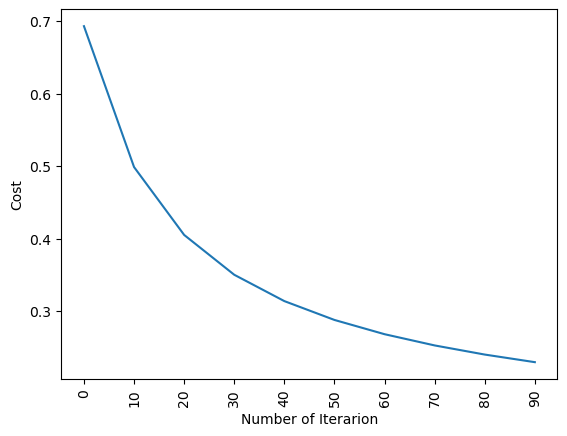

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [46]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)
    
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100) 

<br><br>

Let's run the model, this time with the features selected.

<br><br>

In [51]:
drop_list_1 = ['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'area_mean', 'area_se',
               'area_worst', 'radius_worst', 'concavity_mean', 'concavity_se', 
               'concavity_worst', 'concave points_worst', 'texture_worst']

modified_x = x_data.drop(drop_list_1,axis = 1 ) 

In [55]:
x_min = np.min(modified_x, axis=0)
x_max = np.max(modified_x, axis=0)

modified_x_norm = (modified_x - x_min) / (x_max - x_min)

In [56]:
y_data = cancer_df['diagnosis_binary'].values

In [79]:
x_train_1, x_test_1, y_train, y_test = train_test_split(modified_x_norm, y_data, test_size=0.15, random_state=42)

x_train_1 = x_train_1.T
x_test_1 = x_test_1.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (18, 483)
x test:  (18, 86)
y train:  (483,)
y test:  (86,)


In [80]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [81]:
def sigmoid(z):
    y_hat = 1/(1+np.exp(-z))
    return y_hat

In [82]:
def forward_backward_propagation(w,b,x_train_1,y_train):
    # forward propagation
    z = np.dot(w.T,x_train_1) + b
    y_hat = sigmoid(z)
    loss = -y_train*np.log(y_hat)-(1-y_train)*np.log(1-y_hat)
    cost = (np.sum(loss))/x_train_1.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    dw = (np.dot(x_train,((y_hat-y_train).T)))/x_train_1.shape[1] # x_train.shape[1]  is for scaling
    db = np.sum(y_hat-y_train)/x_train_1.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"dw": dw,"db": db}
    return cost,gradients

In [83]:
def update(w, b, x_train_1, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train_1,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["dw"]
        b = b - learning_rate * gradients["db"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [84]:
def predict(w,b,x_test_1):
     #x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test_1)+b)
    Y_prediction = np.zeros((1,x_test_1.shape[1])) 
     #if z is bigger than 0.5 our prediction is sign one (y_head = 1)
     #if z is smaller than 0.5 our prediction is sign one (y_head = 0)
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5: 
            Y_prediction[0,i] = 0
        else:
             Y_prediction[0,i] = 1
             
    return Y_prediction

Cost after iteration 0: 0.694693
Cost after iteration 10: 0.578242
Cost after iteration 20: 0.505997
Cost after iteration 30: 0.453503
Cost after iteration 40: 0.413907
Cost after iteration 50: 0.383018
Cost after iteration 60: 0.358235
Cost after iteration 70: 0.337881
Cost after iteration 80: 0.320839
Cost after iteration 90: 0.306339


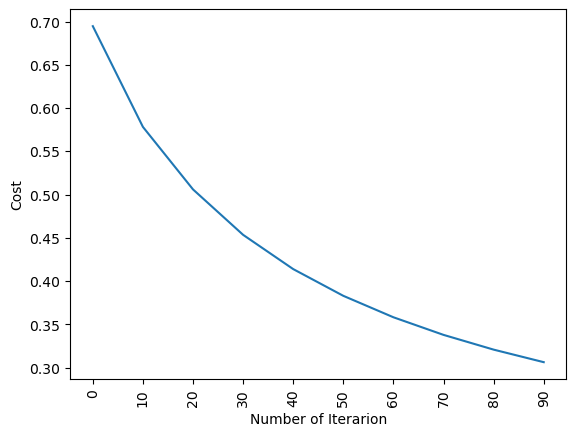

train accuracy: 93.7888198757764 %
test accuracy: 91.86046511627907 %


In [85]:
def logistic_regression(x_train_1, y_train, x_test_1, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train_1.shape[0]  
    w,b = initialize_weights_and_bias(dimension)
    
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train_1, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train_1, y_train, x_test_1, y_test,learning_rate = 1, num_iterations = 100) 